# Accuracy

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [1]:
def accuracy(y_true, y_pred):
  correct_counter = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == yp:
      correct_counter += 1
  
  return correct_counter / len(y_true)

def true_positive(y_true, y_pred):
  tp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 1:
      tp += 1
  
  return tp

def true_negative(y_true, y_pred):
  tn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  
  return tn

def false_positive(y_true, y_pred):
  fp = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  
  return fp

def false_negative(y_true, y_pred):
  fn = 0
  for yt, yp in zip(y_true, y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  
  return fn

def accuracy_v2(y_true, y_pred):
 tp = true_positive(y_true, y_pred)
 fp = false_positive(y_true, y_pred)
 fn = false_negative(y_true, y_pred)
 tn = true_negative(y_true, y_pred)
 accuracy_score = (tp + tn) / (tp + tn + fp + fn)
 
 return accuracy_score


# Precision

In [2]:
def precision(y_true, y_pred):
 tp = true_positive(y_true, y_pred)
 fp = false_positive(y_true, y_pred)
 precision = tp / (tp + fp)
 
 return precision

# Recall

In [3]:
def recall(y_true, y_pred):
  tp = true_positive(y_true, y_pred)
  fn = false_negative(y_true, y_pred)
  recall = tp / (tp + fn)
  return recall

# Precision-Recall Curve

In [4]:
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]

precisions = []
recalls = []
thresholds = [0.0490937 , 0.05934905, 0.079377, 
             0.08584789, 0.11114267, 0.11639273,
             0.15952202, 0.17554844, 0.18521942,
             0.27259048, 0.31620708, 0.33056815,
             0.39095342, 0.61977213]

for i in thresholds:
  temp_prediction = [1 if x >= i else 0 for x in y_pred]
  p = precision(y_true, temp_prediction)
  r = recall(y_true, temp_prediction)
  precisions.append(p)
  recalls.append(r)

Text(0, 0.5, 'Precision')

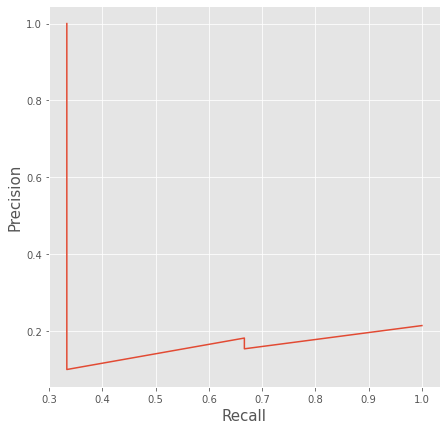

In [6]:
plt.figure(figsize=(7, 7))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)

# F1-Score

In [7]:
def f1(y_true, y_pred):
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  score = (2 * p * r) / (p + r)

  return score

# TPR or True Positive Rate (**sensitivity**)

In [8]:
def tpr(y_true, y_pred):
  return recall(y_true, y_pred)

#  FPR or False Positive Rate

In [9]:
def fpr(y_true, y_pred):
  fp = false_positive(y_true, y_pred)
  tn = true_negative(y_true, y_pred)
  
  return fp / (fp + tn)

In [10]:
tpr_lst = []
fpr_lst = []

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
thresholds =  [0, 0.1, 0.2, 0.3, 0.4, 0.5,
                0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]


for thresh in thresholds:
  y_temp = [1 if x >= thresh else 0 for x in thresholds]
  # calculate tpr
  tpr_temp = tpr(y_true, y_temp)
  # calculate fpr
  fpr_temp = fpr(y_true, y_temp)

  tpr_lst.append(tpr_temp)
  fpr_lst.append(fpr_temp)

pd.DataFrame(
    {
        'thresholds': thresholds,
     'tpr': tpr_lst,
     'fpr': fpr_lst
    }
).set_index('thresholds')

,tpr,fpr
thresholds,,
0.00,1.00,1.000000
0.10,1.00,0.888889
0.20,1.00,0.777778
0.30,1.00,0.666667
0.40,1.00,0.555556
0.50,0.75,0.555556
0.60,0.75,0.444444
0.70,0.50,0.444444
0.80,0.50,0.333333


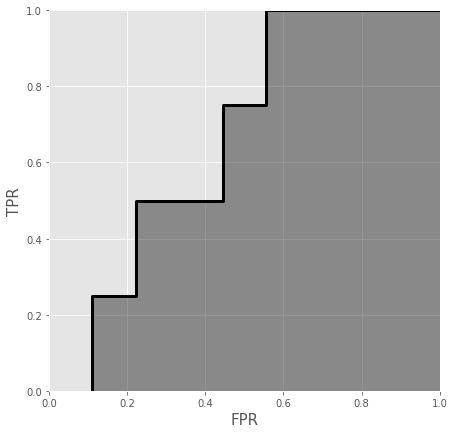

In [12]:
plt.figure(figsize=(7, 7))
plt.fill_between(fpr_lst, tpr_lst, alpha=0.4, color='k')
plt.plot(fpr_lst, tpr_lst, lw=3, color='k')
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

In [23]:
tp_list = []
fp_list = []
# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1,
 0, 0, 1, 0, 1, 0, 0, 1]
# predicted probabilities of a sample being 1
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
# some handmade thresholds
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
# loop over all thresholds
for thresh in thresholds:
  # calculate predictions for a given threshold
  temp_pred = [1 if x >= thresh else 0 for x in y_pred]
  # calculate tp
  temp_tp = true_positive(y_true, temp_pred)
  # calculate fp
  temp_fp = false_positive(y_true, temp_pred)
  # append tp and fp to lists
  tp_list.append(temp_tp)
  fp_list.append(temp_fp)

df = pd.DataFrame(
    {
        'thresholds': thresholds,
     'tpr': np.array(tp_list)/5.,
     'fpr': np.array(fp_list)/10.
    }
).set_index('thresholds')

df

,tpr,fpr
thresholds,,
0.00,1.0,1.0
0.10,1.0,0.9
0.20,1.0,0.7
0.30,0.8,0.6
0.40,0.8,0.3
0.50,0.8,0.3
0.60,0.8,0.2
0.70,0.6,0.1
0.80,0.6,0.1


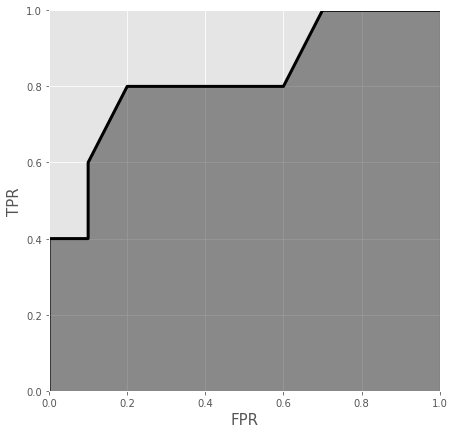

In [24]:
plt.figure(figsize=(7, 7))
plt.fill_between(df['fpr'], df['tpr'], alpha=0.4, color='k')
plt.plot(df['fpr'], df['tpr'], lw=3, color='k')
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.show()

# Log-Loss

## $$LogLoss = -1.0 × (target × log(prediction) + (1 - target) × log(1 - prediction))$$

In [ ]:
def log_loss(y_true, y_proba):
  epsilon = 1e-15
  loss = []
  for yt, yp in zip(y_true, y_proba):
    yp = np.clip(yp, epsilon, 1 - epsilon)
    temp_loss = -1.0 * (yt * np.log(yp) + (1 - yt) * np.log(1 - yp))
    loss.append(temp_loss)
  
  return np.mean(loss)

# Multi-label classification problem
The metrics for this type of classification problem are a bit different. Some suitable and most common metrics are:
- Precision at k (P@k)
- Average precision at k (AP@k)
- Mean average precision at k (MAP@k)
- Log-Loss

## Precision at k (P@k)

In [25]:
def pk(y_true, y_pred, k):
  # if k is 0, return 0. we should never have this
  # as k is always >= 1
  if k == 0:
    return 0
  # we are interested only in top-k predictions
  y_pred = y_pred[:k]
  # convert predictions to set
  pred_set = set(y_pred)
  # convert actual values to set
  true_set = set(y_true)
  # find common values
  common_values = pred_set.intersection(true_set)

  # return length of common values over k
  return len(common_values) / len(y_pred[:k])

## Average precision at k (AP@k)

In [26]:
def apk(y_true, y_pred, k):
  # Average precision at k (AP@k)
  pk_values = []
  # loop over all k. from 1 to k + 1
  for i in range(1, k+1):
    # calculate p@i and append to list
    pk_values.append(pk(y_true, y_pred, i))
  
  # if we have no values in the list, return 0
  if len(pk_values) == 0:
    return 0
  
  # else, we return the sum of list over length of list
  return sum(pk_values) / len(pk_values)


In [27]:
y_true = [
          [1, 2, 3],
          [0, 2],
          [1],
          [2, 3],
          [1, 0],
          [],
]
y_pred = [
          [0, 1, 2],
          [1],
          [0, 2, 3],
          [2, 3, 4, 0],
          [0, 1, 2],
          [0],
]

for i in range(len(y_true)):
  for j in range(1, 4):
    print(
        f'''
            y_true={y_true[i]},
            y_pred={y_pred[i]},
            AP@{j}={apk(y_true[i], y_pred[i], k=j)}

        '''
    )


            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@1=0.0

        

            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@2=0.25

        

            y_true=[1, 2, 3],
            y_pred=[0, 1, 2],
            AP@3=0.38888888888888884

        

            y_true=[0, 2],
            y_pred=[1],
            AP@1=0.0

        

            y_true=[0, 2],
            y_pred=[1],
            AP@2=0.0

        

            y_true=[0, 2],
            y_pred=[1],
            AP@3=0.0

        

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@1=0.0

        

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@2=0.0

        

            y_true=[1],
            y_pred=[0, 2, 3],
            AP@3=0.0

        

            y_true=[2, 3],
            y_pred=[2, 3, 4, 0],
            AP@1=1.0

        

            y_true=[2, 3],
            y_pred=[2, 3, 4, 0],
            AP@2=1.0

        

            y_t

## Mean Average Precision At k (MAP@k)

So, this is how we can calculate AP@k which is per sample. In machine learning, we are interested in all samples, and that’s why we have mean average precision at k or MAP@k. MAP@k is just an average of AP@k.

In [28]:
def mapk(y_true, y_pred, k):
  # initialize empty list for apk values
  apk_values = []
  # loop over all samples
  for i in range(len(y_true)):
    # store apk values for every sample
    apk_values.append(
        apk(y_true[i], y_pred[i], k=k)
    )
  
  # return mean of apk values list
  return sum(apk_values) / len(apk_values)

In [29]:
mapk(y_true, y_pred, k=1)

0.3333333333333333

In [30]:
mapk(y_true, y_pred, k=2)

0.375

In [31]:
mapk(y_true, y_pred, k=3)

0.3611111111111111

In [32]:
mapk(y_true, y_pred, k=4)

0.34722222222222215

P@k, AP@k and MAP@k all range from 0 to 1 with 1 being the best.

---
# Regression Metrics

*Error = True Value – Predicted Value*
*Absolute Error = Abs ( True Value – Predicted Value )*

## Mean Absolute Error (MAE)

In [33]:
def mean_absolute_error(y_true, y_pred):
  # initialize error at 0
  error = 0
  # loop over all samples in the true and predicted list
  for yt, yp in zip(y_true, y_pred):
    error += np.abs(yt - yp)
  
  # return mean error
  return error / len(y_true)